<a href="https://colab.research.google.com/github/sungueve/Yvonne-/blob/main/yvonne__Time_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series models are used to predict how a certain numberical feature (e.g. Revenue) will change over time.


The time granularity for which these predictions will be generated - hourly, daily, weekly, monthly, yearly -  depends on the time dimension available in your dataset and on how (and if) you choose to aggregate your values

In [ ]:
#installing darts -  a library for time series
!pip install darts --quiet
import darts
print(f"Darts version: {darts.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

ModuleNotFoundError: No module named 'darts'

In [ ]:
#using darts
from darts import TimeSeries

In [ ]:
#import pandas and the dataset
import pandas as pd
df = pd.read_csv("ice_cream.csv")
df.head()

,Month,ice_cream
0,2004-01,12
1,2004-02,13
2,2004-03,14
3,2004-04,16
4,2004-05,20


<Axes: xlabel='Month'>

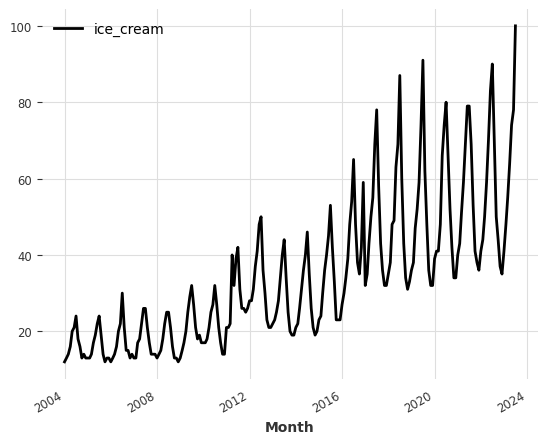

In [ ]:

series = TimeSeries.from_dataframe(df, 'Month', 'ice_cream')
series.plot()

In [ ]:
#missing values
#it's important to fill missing values in the column whose values you're trying to predict (in your case the revenue column)
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

In [ ]:
#if you observe an exponential trend, do this
import numpy as np
logged = (series).map(lambda x: np.log(x))

In [ ]:
#scale the data
from darts.dataprocessing.transformers.scaler import Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ts_transformer = Scaler(scaler)
scaled_ts = ts_transformer.fit_transform(logged)

<Axes: xlabel='Month'>

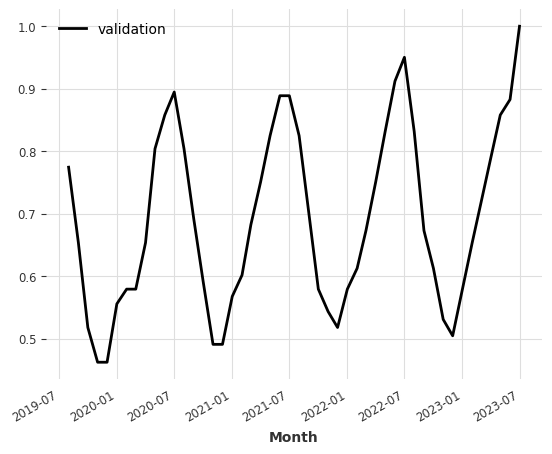

In [ ]:
#train test split
train, test = (scaled_ts).split_before(0.8)
test.plot(label="validation")

## Model option 1

In [ ]:

from darts.models import ExponentialSmoothing

In [ ]:
# initialize and fit an Exponential Smoothing model
model = ExponentialSmoothing()
model.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0, kwargs=None)

In [ ]:
# generate predictions (for the test set)
exp_forecast = model.predict(len(test))

<Axes: xlabel='Month'>

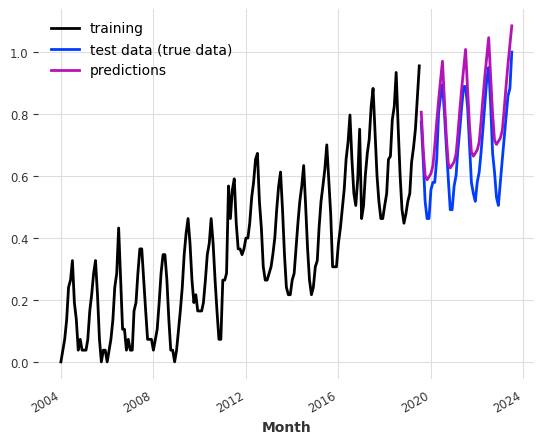

In [ ]:
#plot the training data, the test data and your predictions
train.plot(label="training")
test.plot(label="test data (true data)")
exp_forecast.plot(label = "predictions")

In [ ]:
#evaluate how accurate your generated predictions are (compared to the true data in Test set)
from darts.metrics import mape
accuracy = mape(test, exp_forecast)
print(f"Mean Absolute Percentage Error: {accuracy}")

Mean Absolute Percentage Error: 14.51643531360902


## 2. Other Time series models

In [ ]:
#2. multiple models
from darts.models import AutoARIMA, Prophet, TBATS

In [ ]:

results_dict = {}
for model in [AutoARIMA, Prophet, TBATS]:
    temp = model()
    temp.fit(train)
    preds = temp.predict(len(test))
    accuracy = mape(test, preds)
    results_dict[f"{model}"] = accuracy
results_dict

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmfme1bq/cbo65f3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppmfme1bq/jwlywcto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97834', 'data', 'file=/tmp/tmppmfme1bq/cbo65f3t.json', 'init=/tmp/tmppmfme1bq/jwlywcto.json', 'output', 'file=/tmp/tmppmfme1bq/prophet_model8y93xxpr/prophet_model-20231212105004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


{"<class 'darts.models.forecasting.auto_arima.AutoARIMA'>": 20.056972568863195,
 "<class 'darts.models.forecasting.prophet_model.Prophet'>": 14.925448265780114,
 "<class 'darts.models.forecasting.tbats_model.TBATS'>": 5.609777147484104}

<Axes: xlabel='Month'>

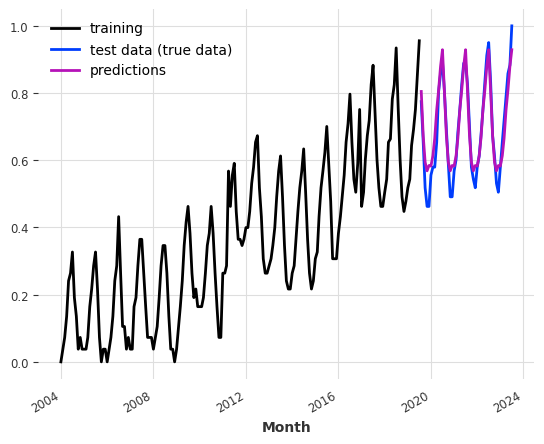

In [ ]:
#plot the training data, the test data and your predictions of TBATS

#train the model and generate predictions
temp = TBATS()
temp.fit(train)
TBATS_preds = temp.predict(len(test))


train.plot(label="training")
test.plot(label="test data (true data)")
TBATS_preds.plot(label = "predictions")